In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#READ IN CSV


In [0]:
df0 = pd.read_csv('Motor_Vehicle_Collisions_-_Person.csv')

In [0]:
df = df0.copy()

In [0]:
df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10252788,4230640,10/25/2019,17:42,0278267c-0b21-470f-8a54-da71b7361448,Occupant,Unspecified,19142923.0,0.0,Not Ejected,Does Not Apply,Does Not Apply,"Any person in the rear of a station wagon, pic...",Unknown,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
1,10253512,4230733,10/10/2019,19:45,81161123-516c-438d-8f29-a107d2783d85,Occupant,Unspecified,19143291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN
2,10250662,4230235,10/26/2019,10:40,b5da9aa6-3230-4203-bbde-3b6f9248ac31,Occupant,Injured,19141868.0,11.0,Not Ejected,Conscious,Entire Body,"Middle rear seat, or passenger lying across a ...",Unknown,NaN,NaN,Whiplash,Passenger,NaN,NaN,F
3,10252894,4231115,10/26/2019,18:45,4ed210b6-678c-4fe3-ae8c-3ecd30eae7aa,Pedestrian,Injured,NaN,30.0,NaN,Conscious,Knee-Lower Leg Foot,Driver,None,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing Against Signal,Fracture - Distorted - Dislocation,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Texting,M
4,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN


In [0]:
df.dtypes

UNIQUE_ID                  int64
COLLISION_ID               int64
CRASH_DATE                object
CRASH_TIME                object
PERSON_ID                 object
PERSON_TYPE               object
PERSON_INJURY             object
VEHICLE_ID               float64
PERSON_AGE               float64
EJECTION                  object
EMOTIONAL_STATUS          object
BODILY_INJURY             object
POSITION_IN_VEHICLE       object
SAFETY_EQUIPMENT          object
PED_LOCATION              object
PED_ACTION                object
COMPLAINT                 object
PED_ROLE                  object
CONTRIBUTING_FACTOR_1     object
CONTRIBUTING_FACTOR_2     object
PERSON_SEX                object
dtype: object

In [0]:
df.shape

(3912166, 21)

# DELETE UNRELEVANT COLUMNS

In [0]:
cols = ['UNIQUE_ID', 'COLLISION_ID', 'PERSON_ID','PED_ACTION', 'PED_LOCATION', 'VEHICLE_ID', 'CONTRIBUTING_FACTOR_2', 'CONTRIBUTING_FACTOR_1']

In [0]:
df = df.drop(columns=cols)

df.head()

,CRASH_DATE,CRASH_TIME,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
0,10/25/2019,17:42,Occupant,Unspecified,0.0,Not Ejected,Does Not Apply,Does Not Apply,"Any person in the rear of a station wagon, pic...",Unknown,Does Not Apply,Passenger,F
1,10/10/2019,19:45,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN
2,10/26/2019,10:40,Occupant,Injured,11.0,Not Ejected,Conscious,Entire Body,"Middle rear seat, or passenger lying across a ...",Unknown,Whiplash,Passenger,F
3,10/26/2019,18:45,Pedestrian,Injured,30.0,NaN,Conscious,Knee-Lower Leg Foot,Driver,None,Fracture - Distorted - Dislocation,Pedestrian,M
4,11/21/2016,13:05,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN


# EXTRACT YEAR AND MONTH AND DELETE NON-2020 COLLISION

In [0]:
def drop(df, cname, cval): 
  indexNames = df[df[cname] ==  cval].index
  # Delete these row indexes from dataFrame
  df = df.drop(indexNames)
  return df

df2 = df.copy()

df2['CRASH_YEAR'] = pd.DatetimeIndex(df2['CRASH_DATE']).year
df2['CRASH_MONTH'] = pd.DatetimeIndex(df2['CRASH_DATE']).month
df2['hour']= df2.CRASH_TIME.str.extract("(^\d+):", expand=False)

for year in np.unique(df2['CRASH_YEAR']) : 
  if year != 2020: df2 = drop(df2, 'CRASH_YEAR', year)

df2 = df2.drop(columns=['CRASH_DATE', 'CRASH_TIME', 'CRASH_YEAR', 'PERSON_INJURY'])

print('NEW SHAPE:', df2.shape)
print('REMAINING COLLISION MONTHS:', np.unique(df2['CRASH_MONTH']))

df = df2.copy()


NEW SHAPE: (162438, 12)
REMAINING COLLISION MONTHS: [1 2 3 4]


In [0]:
df.head()

,PERSON_TYPE,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_MONTH,hour
3703706,Occupant,39.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,Does Not Apply,Driver,M,1,0
3703707,Occupant,27.0,Not Ejected,Conscious,Neck,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,1,19
3703708,Occupant,58.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Unknown,Does Not Apply,Driver,M,1,9
3703709,Occupant,68.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,Driver,F,1,16
3703710,Occupant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,U,1,5


# DELETE ROWS WITH OUT OF BOUNDS AGE_VALUES

In [0]:
def drop_range(df, cname, cmin, cmax): 
  index_lows = df[df[cname] <  cmin].index 
  index_highs = df[df[cname] >  cmax].index
  # Delete these row indexes from dataFrame
  df = df.drop(index_lows)
  df = df.drop(index_highs)
  return df

df = drop_range(df, 'PERSON_AGE', 1, 100)

print('REMAINING AGE_VALUES:\n', np.unique(df['PERSON_AGE']))
df.shape 


REMAINING AGE_VALUES:
 [ 1.  2.  3. ... nan nan nan]


(162097, 12)

In [0]:
df.head()

,PERSON_TYPE,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_MONTH,hour
3703706,Occupant,39.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,Does Not Apply,Driver,M,1,0
3703707,Occupant,27.0,Not Ejected,Conscious,Neck,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,1,19
3703708,Occupant,58.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Unknown,Does Not Apply,Driver,M,1,9
3703709,Occupant,68.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,Driver,F,1,16
3703710,Occupant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,U,1,5


#RECONCILE PERSON_TYPE AND PED_ROLE

PERSON_TYPE (Occupant, Bicylist, Pedestrian) <br>
PED_ROLE(Driver, Passenger, Pedestrian, In-line skater)

['Bicyclist'] ['Driver' 'Passenger']
8


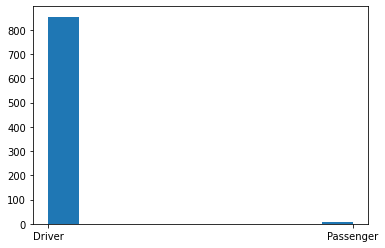

In [0]:
df4 = df.copy()
bike_indices = df4[df4['PERSON_TYPE'] == 'Bicyclist' ].index 

df4 = df4.loc[bike_indices, :]
df4.head()
x = np.unique(df4['PERSON_TYPE'])
y = np.unique(df4['PED_ROLE'])
print(x, y)

plt.hist(df4.PED_ROLE)

bike_passengers = df4[df4['PED_ROLE'] == 'Passenger'].index 
print(len(bike_passengers))

In [0]:
df5 = df.copy()
df5 = df5.drop(bike_passengers)
# convert 'driver' to 'bicyclist' in PED_ROLE if PERSON_TYPE is bicyclist 

mask = (df5['PERSON_TYPE'] == 'Bicyclist') 
df5['PED_ROLE'][mask] = 'Bicyclist'


df5.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PERSON_TYPE,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_MONTH,hour
3703706,Occupant,39.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,Does Not Apply,Driver,M,1,0
3703707,Occupant,27.0,Not Ejected,Conscious,Neck,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,1,19
3703708,Occupant,58.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Unknown,Does Not Apply,Driver,M,1,9
3703709,Occupant,68.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,Driver,F,1,16
3703710,Occupant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,U,1,5


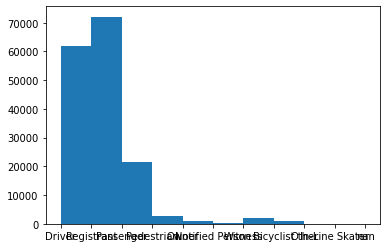

In [0]:
plt.hist(df5.PED_ROLE.astype(str))
df5 = df5.drop(columns=['PERSON_TYPE', 'CRASH_MONTH'])
df = df5.copy()

# DELETE ROWS WITH NULL VALUE OR "UNKNOWN" FIELDS

In [0]:
for ss in df.columns: 
  print('Dropping Null and "UNKNOWN" Values From:', ss)
  df = df.dropna(subset=[ss])
  df = drop(df, ss, 'Unknown')
  print(df.shape)

#df.dropna(subset=ss1)
#df.shape

Dropping Null and "UNKNOWN" Values From: PERSON_AGE
(128142, 10)
Dropping Null and "UNKNOWN" Values From: EJECTION
(83905, 10)
Dropping Null and "UNKNOWN" Values From: EMOTIONAL_STATUS
(83669, 10)
Dropping Null and "UNKNOWN" Values From: BODILY_INJURY
(83373, 10)
Dropping Null and "UNKNOWN" Values From: POSITION_IN_VEHICLE
(81812, 10)
Dropping Null and "UNKNOWN" Values From: SAFETY_EQUIPMENT


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(67765, 10)
Dropping Null and "UNKNOWN" Values From: COMPLAINT
(67666, 10)
Dropping Null and "UNKNOWN" Values From: PED_ROLE
(67666, 10)
Dropping Null and "UNKNOWN" Values From: PERSON_SEX
(67666, 10)
Dropping Null and "UNKNOWN" Values From: hour
(67666, 10)


# DELETE ROWS WITH OTHER UN-MEANINGFUL VALUES

In [0]:
df = drop(df, 'PERSON_SEX', 'U')
print(df.shape)

df = drop(df, 'PED_ROLE', 'Other')
print(df.shape)

df = drop(df, 'COMPLAINT', 'Does Not Apply')
print(df.shape)

df = drop(df, 'SAFETY_EQUIPMENT', '-')
print(df.shape)

df = drop(df, 'POSITION_IN_VEHICLE', 'Does Not Apply')
print(df.shape)

df = drop(df, 'SAFETY_EQUIPMENT', 'Other')
print(df.shape)

df = drop(df, 'BODILY_INJURY', 'Does Not Apply')
print(df.shape)

df = drop(df, 'EMOTIONAL_STATUS', 'Does Not Apply')
print(df.shape)

df = drop(df, 'EJECTION', 'Does Not Apply')
print(df.shape)



(67521, 10)
(67514, 10)
(7673, 10)
(7673, 10)
(7673, 10)
(7623, 10)
(7622, 10)
(7611, 10)
(7611, 10)


# CHECK FIELD VALUES

In [0]:
for c in df.columns: 
  print(c)
  uniq_vals = np.unique(df[c].astype(str))
  if len(uniq_vals) < 200: print(uniq_vals)

PERSON_AGE
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0'
 '19.0' '2.0' '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0'
 '28.0' '29.0' '3.0' '30.0' '31.0' '32.0' '33.0' '34.0' '35.0' '36.0'
 '37.0' '38.0' '39.0' '4.0' '40.0' '41.0' '42.0' '43.0' '44.0' '45.0'
 '46.0' '47.0' '48.0' '49.0' '5.0' '50.0' '51.0' '52.0' '53.0' '54.0'
 '55.0' '56.0' '57.0' '58.0' '59.0' '6.0' '60.0' '61.0' '62.0' '63.0'
 '64.0' '65.0' '66.0' '67.0' '68.0' '69.0' '7.0' '70.0' '71.0' '72.0'
 '73.0' '74.0' '75.0' '76.0' '77.0' '78.0' '79.0' '8.0' '80.0' '81.0'
 '82.0' '83.0' '84.0' '85.0' '86.0' '87.0' '88.0' '89.0' '9.0' '90.0'
 '92.0' '99.0']
EJECTION
['Ejected' 'Not Ejected' 'Partially Ejected' 'Trapped']
EMOTIONAL_STATUS
['Apparent Death' 'Conscious' 'Incoherent' 'Semiconscious' 'Shock'
 'Unconscious']
BODILY_INJURY
['Abdomen - Pelvis' 'Back' 'Chest' 'Elbow-Lower-Arm-Hand' 'Entire Body'
 'Eye' 'Face' 'Head' 'Hip-Upper Leg' 'Knee-Lower Leg Foot' 'Neck'
 'Shoulder - Upper Arm']
P

# DISCRETIZE AGE

In [0]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 75, 100]
df['AGE_RANGE'] = pd.cut(df['PERSON_AGE'], age_bins).astype(str)
df = df.drop(columns=['PERSON_AGE'])
df.head()

,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,hour,AGE_RANGE
3703707,Not Ejected,Conscious,Neck,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,19,"(20, 30]"
3703783,Not Ejected,Conscious,Chest,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,M,4,"(40, 50]"
3703809,Not Ejected,Conscious,Entire Body,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,22,"(20, 30]"
3703837,Not Ejected,Conscious,Neck,Driver,Lap Belt & Harness,Whiplash,Driver,M,12,"(30, 40]"
3703846,Not Ejected,Conscious,Neck,Right rear passenger or motorcycle sidecar pas...,Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,F,2,"(75, 100]"


# PLOT COLUMN DISTRIBUTIONS

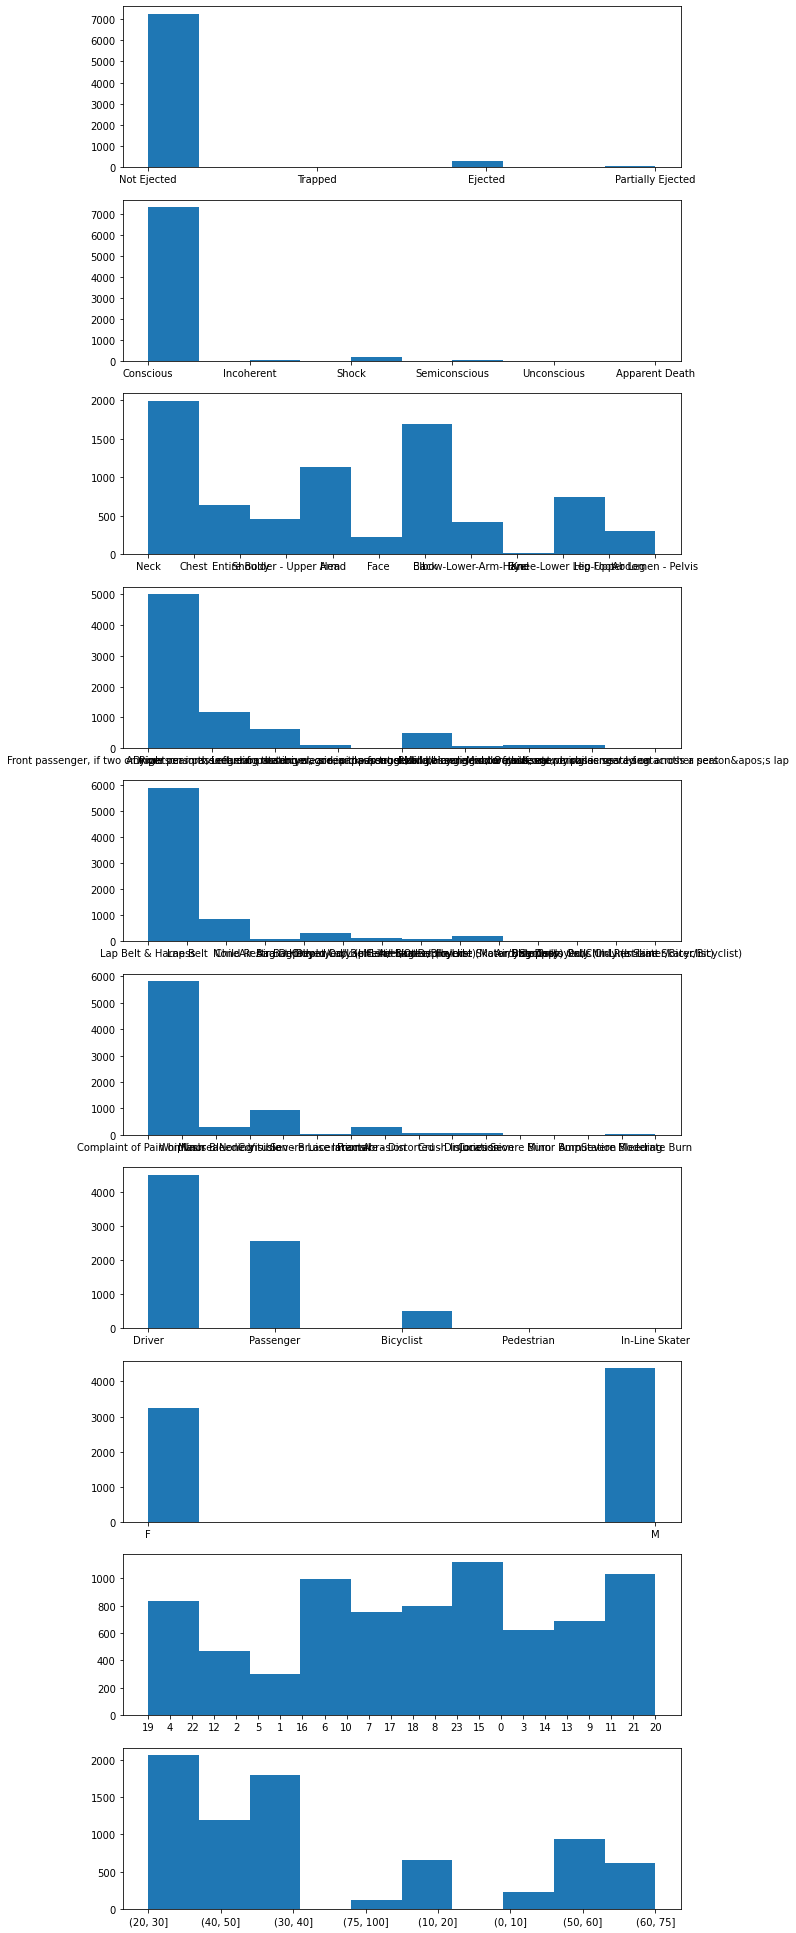

In [0]:
fig, axs = plt.subplots(len(df.columns),1, sharey=False, figsize=(10,35))

for i in range(len(df.columns)): 
  axs[i].hist(df[df.columns[i]])

plt.show()

# LABEL DATASET VALUES

In [0]:
df3 = df.copy()

for c in df3: 
  df3[c] = c + ': ' + df3[c].astype(str)

df3.head()


,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,hour,AGE_RANGE
3703707,EJECTION: Not Ejected,EMOTIONAL_STATUS: Conscious,BODILY_INJURY: Neck,POSITION_IN_VEHICLE: Driver,SAFETY_EQUIPMENT: Lap Belt & Harness,COMPLAINT: Complaint of Pain or Nausea,PED_ROLE: Driver,PERSON_SEX: F,hour: 19,"AGE_RANGE: (20, 30]"
3703783,EJECTION: Not Ejected,EMOTIONAL_STATUS: Conscious,BODILY_INJURY: Chest,"POSITION_IN_VEHICLE: Front passenger, if two o...",SAFETY_EQUIPMENT: Lap Belt & Harness,COMPLAINT: Complaint of Pain or Nausea,PED_ROLE: Passenger,PERSON_SEX: M,hour: 4,"AGE_RANGE: (40, 50]"
3703809,EJECTION: Not Ejected,EMOTIONAL_STATUS: Conscious,BODILY_INJURY: Entire Body,POSITION_IN_VEHICLE: Driver,SAFETY_EQUIPMENT: Lap Belt & Harness,COMPLAINT: Complaint of Pain or Nausea,PED_ROLE: Driver,PERSON_SEX: F,hour: 22,"AGE_RANGE: (20, 30]"
3703837,EJECTION: Not Ejected,EMOTIONAL_STATUS: Conscious,BODILY_INJURY: Neck,POSITION_IN_VEHICLE: Driver,SAFETY_EQUIPMENT: Lap Belt & Harness,COMPLAINT: Whiplash,PED_ROLE: Driver,PERSON_SEX: M,hour: 12,"AGE_RANGE: (30, 40]"
3703846,EJECTION: Not Ejected,EMOTIONAL_STATUS: Conscious,BODILY_INJURY: Neck,POSITION_IN_VEHICLE: Right rear passenger or m...,SAFETY_EQUIPMENT: Lap Belt & Harness,COMPLAINT: Complaint of Pain or Nausea,PED_ROLE: Passenger,PERSON_SEX: F,hour: 2,"AGE_RANGE: (75, 100]"


In [0]:
df3.shape

(7611, 10)

#SIMULATE

In [0]:
df3.to_csv('processed_motor_collisions.csv')

In [0]:
from google.colab import files 
#files.download('processed_motor_collisions.csv')

In [0]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import os

In [0]:
df3 = pd.read_csv('processed_motor_collisions.csv')

In [76]:


if not os.path.isdir('logs'):
    print('Made a logs folder') 
    os.mkdir('logs')

if not os.path.isdir('output'):
    print('Made a output folder') 
    os.mkdir('output')


Made a logs folder
Made a output folder


In [0]:
t = time.time()

def log(x, s, c, print2screen=False, output_file =None):
    if print2screen: print(x)
    if output_file:
      output_file = './output/'+output_file
      with open(output_file, 'a+') as ofile:
          ofile.write(x+'\n')
          
    with open('logs/'+ str(t)+'_'+str(s)+'_'+str(c)+'.txt', 'a+') as file:
        file.write(x+'\n')

In [0]:
def compute_confidence(itemsets, min_sup, min_conf, out_file = None):
    rules = {}
    ct_rules_extracted = 0
    for iset in itemsets.keys():
        if len(iset) >= 2:
            for i in iset:
                lhs = iset.difference([i])
                rhs = iset
                numerator = itemsets[rhs]
                denominator = itemsets[lhs]
                score = float(numerator)/float(denominator)
                if score >= float(min_conf) and (lhs,i) not in rules:
                    rules[(lhs,i)] = score
                    lhs = str(list(set(lhs)))
                    log(lhs + ' => [' +  str(i)+  '] (Conf: '+"{:.2f}".format(score*100)+'%, Supp: ' + "{:.1f}".format((float(denominator)/float(len(table)))*100)+'%)', min_sup, min_conf, output_file=out_f)
                    ct_rules_extracted += 1

    log(str(ct_rules_extracted) + ' Rules Extracted. \n', min_sup, min_conf, print2screen=True)

    return rules, ct_rules_extracted

In [0]:
### Returns large 1-itemsets
def one_itemsets(items, min_sup):
    L_1 = {}
    for item in items:
        if frozenset([item]) not in L_1:
            L_1[frozenset([item])] = 1
        else: L_1[frozenset([item])] += 1

    L_1_copy = L_1.copy()
    num_baskets = float(len(L_1.keys()))
    for item,count in L_1.items():
        if (float(count)/num_baskets < min_sup):
            del L_1_copy[item]

    return L_1_copy

In [0]:
### Find large itemsets
def large_k_itemsets(items, table, min_sup):
    large_itemsets = {}
    L = one_itemsets(items, min_sup) # L_(k-1): set of large itemsets that have k-1 items, L from previous iteration
    large_itemsets.update(L)
    k = 2
    while (L != {}):
        C_k = apriori_gen(list(L.keys()),k) # C_k : set of potentially large itemsets that have k number of items
        for row in table:
            for c in C_k:
                if (c <= set(row)):
                    C_k[c] += 1

        L_k = {}
        for c,count in C_k.items():
            if float(count)/len(table) >= min_sup:
                L_k[c] = count

        k += 1
        large_itemsets.update(L_k)
        L = L_k # L: set of large itemsets that have k number of items that meet min support out of C_k

    return large_itemsets


In [0]:
## takes a set of large k-1 itemsets and returns a superset of all large k-itemsets.
def apriori_gen(prior_itemsets,k):
    #join
    C_k = set()
    for p in prior_itemsets: # L_(k-1)
        new_p = []
        if isinstance(p,tuple):
            for i in p:
                new_p.append(i)
            p = new_p
        else:
            p = list(p)
        for q in prior_itemsets:
            new_q = []
            if isinstance(q,tuple):
                for i in q:
                    new_q.append(i)
                q = new_q
            else:
                q = list(q)
            if len(p) ==1 and len(q) ==1:
                if p[:-1] == q[:-1] and p[-1] < q[-1]:
                    new_itemset = frozenset(set(p).union(set(q))) # a set that belongs in C_k
                    if (len(new_itemset) == k):
                        C_k.add(new_itemset)

            elif p[:-2] == q[:-2] and p[-2] < q[-2]:
                new_itemset = frozenset(set(p).union(set(q))) # a set that belongs in C_k
                if (len(new_itemset) == k):
                    C_k.add(new_itemset)

    #prune
    C_new = C_k.copy() # C_new is a copy of C_k for deletion during iteration.
    for c in C_k:
        subsets = [list(x) for x in itertools.combinations(list(c),k-1)]
        for s in subsets:
            if frozenset(s) not in prior_itemsets:
                C_new.remove(frozenset(c))
                break

    return dict.fromkeys(C_new,0)


In [0]:
#MIN_SUP = 0.3
#MIN_CONF = 0.7 

In [0]:
### Get input
#dataset = sys.argv[1]
#min_sup = float(MIN_SUP)
#min_conf = float(MIN_CONF)

#log('Reading data', print2screen=True, )

### read data
data = pd.read_csv('processed_motor_collisions.csv')
table = []
for i in range(data.shape[0]):
    table.append([str(data.values[i,j]) for j in range(data.shape[1])])

#log('Finished building table', print2screen=True)

### get list of items
items = []
for row in table:
    for item in row:
        if (item != 'nan'):
            items.append(item)

#log('Finished building items list', print2screen=True)


In [0]:
! rm -r logs output

In [77]:
log('############# ITEMS #############', min_sup, min_conf, print2screen=True)
log('Number of items: '+str(len(items)), min_sup, min_conf, print2screen=True)
#log(str(items)+ '\n\n', min_sup, min_conf)

log('\n############# TABLE #############', min_sup, min_conf, print2screen=True)
log('Number of rows: '+str(len(table)), min_sup, min_conf, print2screen=True)
#log(str(table)+ '\n\n', min_sup, min_conf)


for ms in range(5, 105, 5): 
  for mc in range(5, 105, 5):
    
    min_sup = ms/100
    min_conf = mc/100

    print('\n\n=========== min_sup: ', min_sup, '\t min_conf:', min_conf, '==============')
    out_f = str(min_sup) +'_'+str(min_conf) + '_output.txt'

    ### find large itemsets satisfying min_sup threshold
    itemsets = large_k_itemsets(items,table,min_sup)
    log('=== Frequent itemsets (min_sup=' + str(min_sup*100) + '%) === \n', min_sup, min_conf,print2screen=True, output_file=out_f)
    for i in itemsets:
        if type(i) == frozenset:
          formatted_i = str(list(i))
          log(formatted_i + ', '+ "{:.1f}".format(float(itemsets[i])/float(len(table))*100) + '%', min_sup, min_conf, output_file=out_f)
    log('\nNumber of itemsets: '+str(len(itemsets)), min_sup, min_conf,print2screen=True)

    # find association rules satisfying min_conf threshold
    log('\n=== High-confidence association rules (min_conf=' +str(min_conf*100) +'%) ===\n', min_sup, min_conf, print2screen=True, output_file=out_f)
    compute_confidence(itemsets, min_sup, min_conf, out_file = out_f)






############# ITEMS #############
Number of items: 83721

############# TABLE #############
Number of rows: 7611


=========== min_sup:  0.05 	 min_conf: 0.05 ==============
=== Frequent itemsets (min_sup=5.0%) === 


Number of itemsets: 1202

=== High-confidence association rules (min_conf=5.0%) ===

4280 Rules Extracted. 



=========== min_sup:  0.05 	 min_conf: 0.1 ==============
=== Frequent itemsets (min_sup=5.0%) === 


Number of itemsets: 1202

=== High-confidence association rules (min_conf=10.0%) ===

4162 Rules Extracted. 



=========== min_sup:  0.05 	 min_conf: 0.15 ==============
=== Frequent itemsets (min_sup=5.0%) === 


Number of itemsets: 1202

=== High-confidence association rules (min_conf=15.0%) ===

4015 Rules Extracted. 



=========== min_sup:  0.05 	 min_conf: 0.2 ==============
=== Frequent itemsets (min_sup=5.0%) === 


Number of itemsets: 1202

=== High-confidence association rules (min_conf=20.0%) ===

3898 Rules Extracted. 



=========== min_sup:  0.05 	

In [0]:
!zip -r /content/logs /content/logs

In [0]:
files.download('output.zip')

In [0]:
files.download('logs.zip')